In [1]:
import collections
import matplotlib.pyplot as plt
from data.data_loader import read_goodreads_10k

In [2]:
books_df = read_goodreads_10k()

### Label distribution

There are 506 different genres and 214 different primary genres


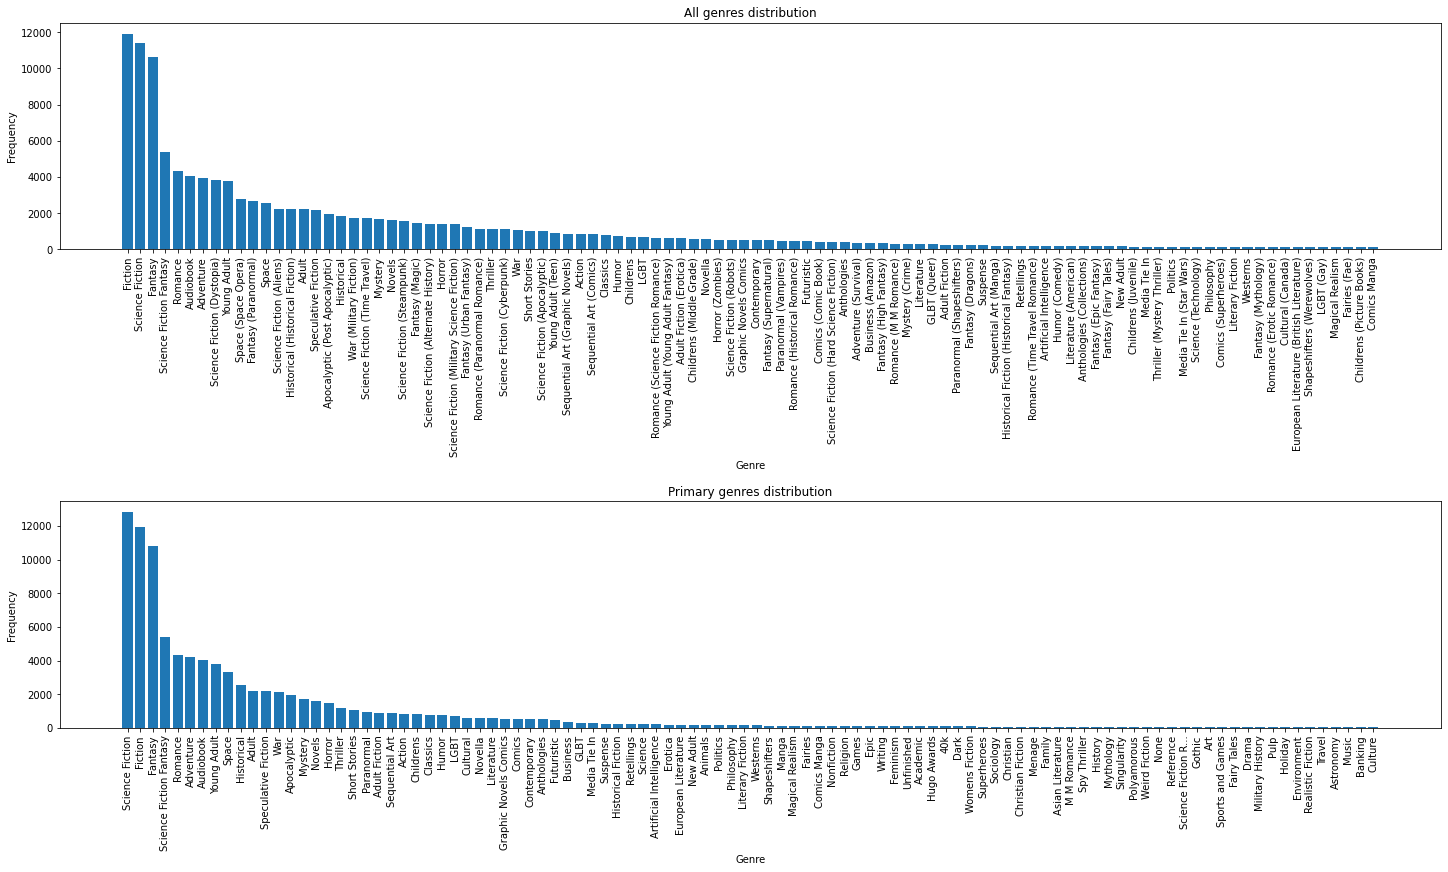

In [3]:
labels_to_show = 100

all_genre_counter = dict(collections.Counter(books_df['genres_list'].sum()))
primary_genre_counter =  dict(collections.Counter(books_df['primary_genres_list'].sum()))

print('There are {} different genres and {} different primary genres'.format(len(all_genre_counter), len(primary_genre_counter)))

all_genre_counter = dict(sorted(all_genre_counter.items(), key=lambda item: item[1], reverse=True)[:labels_to_show])
primary_genre_counter = dict(sorted(primary_genre_counter.items(), key=lambda item: item[1], reverse=True)[:labels_to_show])

fig = plt.figure(constrained_layout=True, figsize=(20,12))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax1.title.set_text('All genres distribution')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(list(all_genre_counter.keys()), list(all_genre_counter.values()))

ax2 = fig.add_subplot(gs[1, :])
ax2.title.set_text('Primary genres distribution')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(list(primary_genre_counter.keys()), list(primary_genre_counter.values()))

plt.show()

### Genre distribution per book

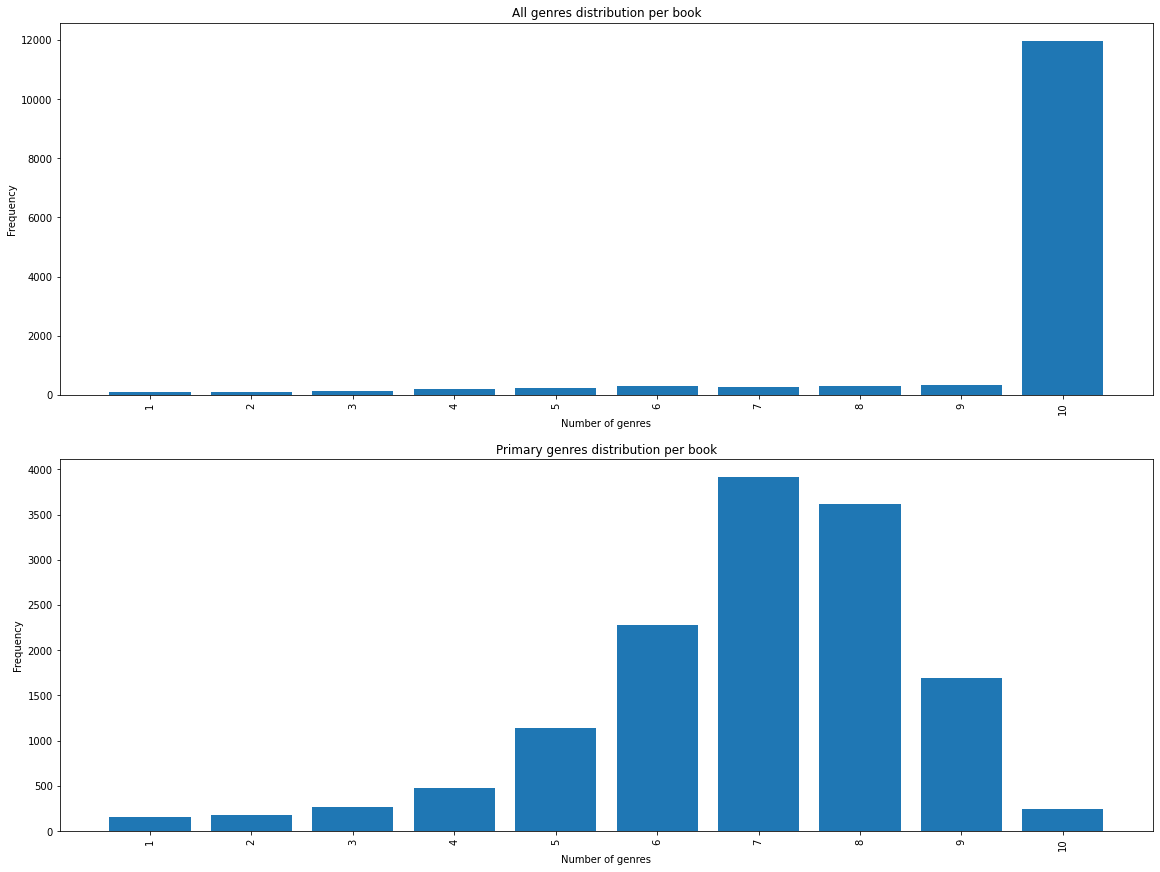

In [4]:
all_genre_per_book = books_df.apply(lambda book: len(book['genres_list']), axis=1).tolist()
primary_genre_per_book = books_df.apply(lambda book: len(book['primary_genres_list']), axis=1).tolist()

all_genre_per_book_counter = dict(collections.Counter(all_genre_per_book))
all_genre_per_book_counter = dict(sorted(all_genre_per_book_counter.items(), key=lambda item: item[0]))

primary_genre_per_book_counter = dict(collections.Counter(primary_genre_per_book))
primary_genre_per_book_counter = dict(sorted(primary_genre_per_book_counter.items(), key=lambda item: item[0]))


fig = plt.figure(constrained_layout=True, figsize=(16,12))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax1.title.set_text('All genres distribution per book')
ax1.set_xlabel('Number of genres')
ax1.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(list(map(str, all_genre_per_book_counter.keys())), list(all_genre_per_book_counter.values()))

ax2 = fig.add_subplot(gs[1, :])
ax2.title.set_text('Primary genres distribution per book')
ax2.set_xlabel('Number of genres')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(list(map(str, primary_genre_per_book_counter.keys())), list(primary_genre_per_book_counter.values()))

plt.show()

There 3663 unique authors


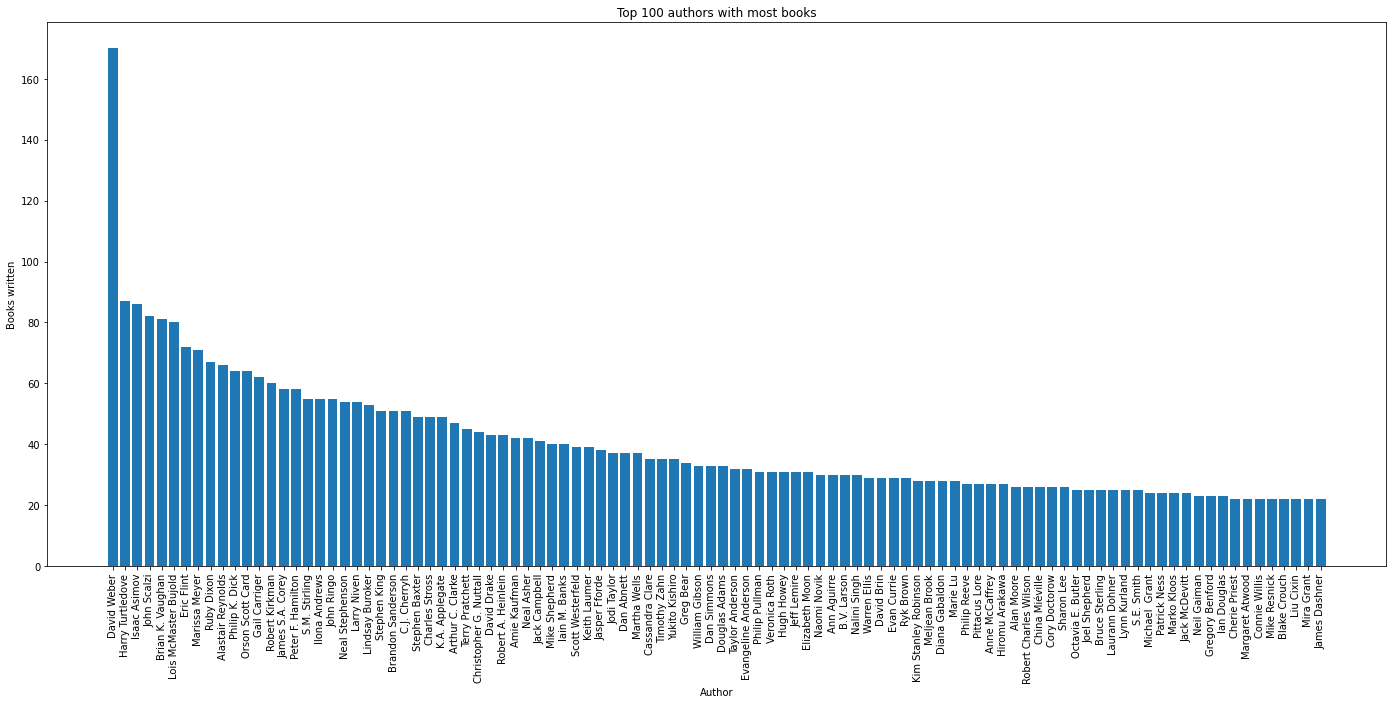

In [5]:
authors_to_show = 100

author_counter = dict(collections.Counter(books_df['author_name']))
print('There {} unique authors'.format(len(list(author_counter.keys()))))

author_counter = dict(sorted(author_counter.items(), key=lambda item: item[1], reverse=True)[:authors_to_show])

fig = plt.figure(figsize=(24,10))

plt.title('Top {} authors with most books'.format(authors_to_show))
plt.xlabel('Author')
plt.ylabel('Books written')
plt.xticks(rotation=90)
plt.bar(list(author_counter.keys()), list(author_counter.values()))

plt.show()

### Description Length Distribution

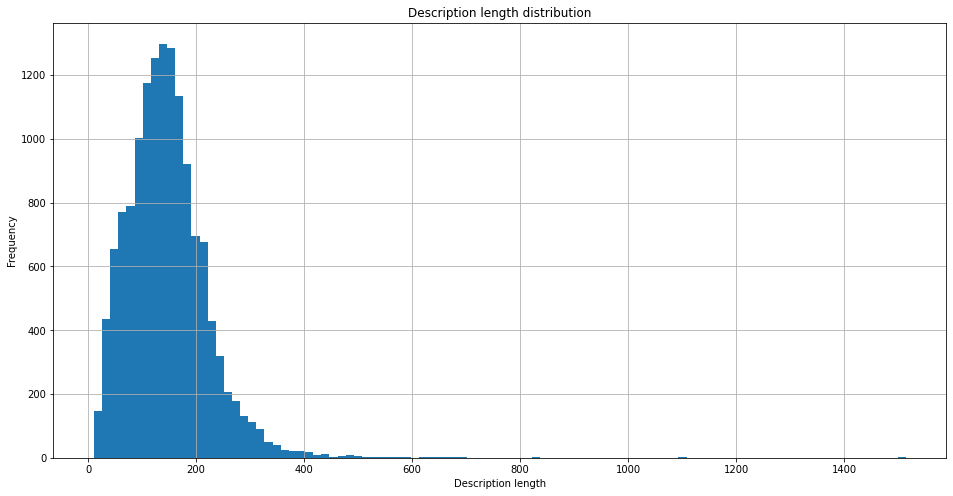

In [6]:
books_df['description_length'].hist(bins=100, figsize=(16, 8))
plt.title('Description length distribution'.format(authors_to_show))
plt.xlabel('Description length')
plt.ylabel('Frequency');

# TODO
#### distribution of authors per genre or genre per author
#### word clouds for top n authors and genres
#### description length per genre and or author